## 数组广播机制

In [1]:
import numpy as np

正常的加法：

In [3]:
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([[0, 1, 2],
              [0, 1, 2],
              [0, 1, 2],
              [0, 1, 2]])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

将b的值变成一维数组[0, 1, 2]之后的加法：

In [4]:
b = np.array([0,1,2])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是**Numpy**检测到b的纬度与a的纬度匹配，所以将b扩展为之前的形式，得到相同的形状。    
对于更高纬度，这样的扩展依然有效。    
如果我们再将a变成一个列向量呢？

In [5]:
a = np.array([0, 10, 20, 30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [6]:
b

array([0, 1, 2])

In [7]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

可以看到，虽然两者的纬度并不同，但是**Numpy**还是根据两者的纬度，自动将它们进行扩展然后进行计算。

对已**Numpy**来说，纬度匹配当且仅当：

* 纬度相同
* 有一个的纬度是1

匹配会从最后一维俄开始进行，知道某一个的纬度全部匹配为止，因此对于以下情况，**Numpy**都会进行相应的匹配：

|A|B|Result|
|---|---|---|
|3d array:256 x 256 x 3|1d array: 3|3d array: 256 x 256 x 3|
|4d array:8 x 1 x 6 x 1|3d array: 7 x 1 x 5|3d array: 8 x 7 x 6 x 5|
|3d array:4 x 5 x 3|1d array: 1|3d array: 5 x 4 x 3|
|3d array:15 x 4 x 13|1d array:15 x 1 x 13|3d array:15 x 4 x 13|
|2d array:4 x 1|1d array：3|2d array:4 x 3|

匹配成功后，**Numpy**会进行运算得到相应的结构。

当然，如果相应的纬度不匹配，那么**Numpy**会报错：

In [8]:
a = np.array([0, 10, 20, 30])
a.shape

(4,)

In [9]:
b.shape

(3,)

In [10]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

将a转换为列向量，还是可以计算出结果

In [11]:
a[:,np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### 例子

In [18]:
x = np.linspace(-.5, .5, 21)

In [19]:
y = x[:, np.newaxis]

In [14]:
x.shape

(21,)

In [15]:
y.shape

(21, 1)

先形成一个21乘21的网格，再计算网格到原点的距离：

In [20]:
radius = np.sqrt(x ** 2 + y ** 2)

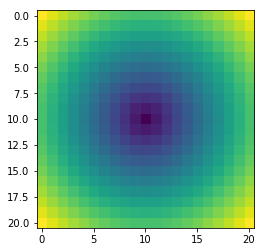

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)